After downloading Dataset from Kaggle, saved it on Google Drive because you can load datasets stored in Drive and you can save your trained models for future. use

In [32]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Path to Dataset on Google Drive

In [34]:
animals_path = '/content/drive/MyDrive/animals.zip'


Code correctly extracts dataset from the zip file into the Colab environment.

animals_path: points to the zip file in Google Drive (e.g., '/content/drive/MyDrive/animals.zip')

extract_path: target folder where the dataset is unpacked

zip_ref.extractall(): unzips everything into /content/animals_dataset

In [35]:
import zipfile
import os

# Destination folder
extract_path = '/content/animals_dataset'

# Unzip the file
with zipfile.ZipFile(animals_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


Show the top level content of the extracted dataset folder.

In [36]:
import os

# List the first few items in the extracted folder
print(os.listdir(extract_path))


['translate.py', 'raw-img']


The dataset was extracted into:
'/content/animals_dataset/raw-img/'

raw-img is the folder where all the class-labeled subfolders (e.g., gatto/, cane/, etc.) live.

In [37]:
raw_img_path = os.path.join(extract_path, 'raw-img')
print(os.listdir(raw_img_path))


['gallina', 'pecora', 'cavallo', 'cane', 'gatto', 'scoiattolo', 'ragno', 'elefante', 'farfalla', 'mucca']


This line is the starting point for inspecting or processing each class in the image dataset.

In [38]:
for folder in os.listdir(raw_img_path):
    print(f"{folder}: {os.listdir(os.path.join(raw_img_path, folder))[:5]}")  # show first 5 files


gallina: ['OIP-TsUXuSytozpuL-f62FawWwHaG7.jpeg', 'OIP-fKwWFKIuUcgIg81_afrfPQHaFY.jpeg', 'OIP-ZcEMYnF3VmKAFUBmzX9oQAHaF7.jpeg', 'OIP-J4LFZxXR0RRKQbwVtvxPgQHaFj.jpeg', '861.jpeg']
pecora: ['OIP-iOiJn7GzCS2Cw1tZzHrpawHaDf.jpeg', 'ea34b50e2cf0083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg', 'ea36b50e2ef5033ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg', 'eb31b10c2df1083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg', 'ea37b50728f2013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg']
cavallo: ['OIP-1V9qGxBzZG_PTBFVwHAb8AHaGe.jpeg', 'OIP-kINDYWAuhRMthgI-qZZbDAHaEo.jpeg', 'OIP-dFdCdAQP9_e5MOmku07yFwHaGk.jpeg', 'OIP-uHETHeqRrWN5gS-_7sapMAHaFj.jpeg', 'OIP-XmmfOGvHGszF-97NrQSudQHaEH.jpeg']
cane: ['OIP-TmRbxXpIP0uKmiwNiiMtawHaGe.jpeg', 'OIP-ivixOPr-vvIs6LsuHuemrQHaHa.jpeg', 'OIP-LTENxIkXD-3Xg-gvgFJWMgHaE8.jpeg', 'OIP-G79YEv4jGaCf1kHVPVgkPQHaFj.jpeg', 'OIP-06txpJjbByyhAlbGkpSimAHaE8.jpeg']
gatto: ['645.jpeg', 'nick-karvounis-538861-unsplash.jpg', '1784


Preview the contents of each class folder in the dataset.

Iterates through each subfolder (i.e., class name like cat, dog, etc.).

Loads and displays the first 5 images from each class using matplotlib.

Also prints the class name (folder) and corresponding filenames.

Helps verify:

1. Class folder names are correct.

2. Each folder contains readable image files.

3. Image files are visually consistent and properly formatted (e.g., .jpg, .png, etc.).

4. File format consistency and correctness (e.g., no corrupted or unexpected files).


Class: gallina


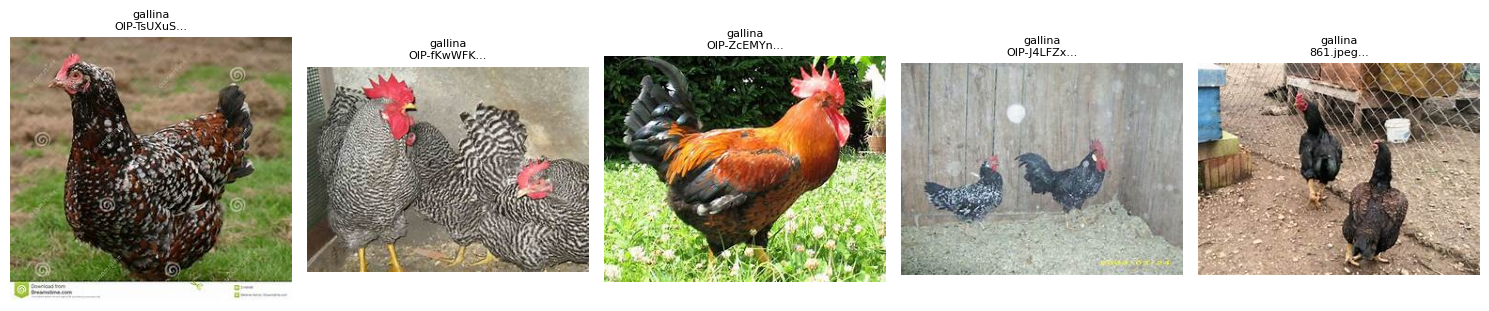


Class: pecora


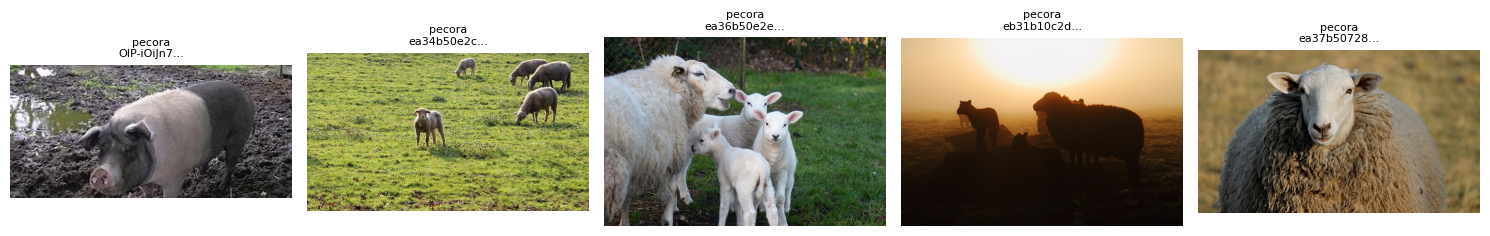


Class: cavallo


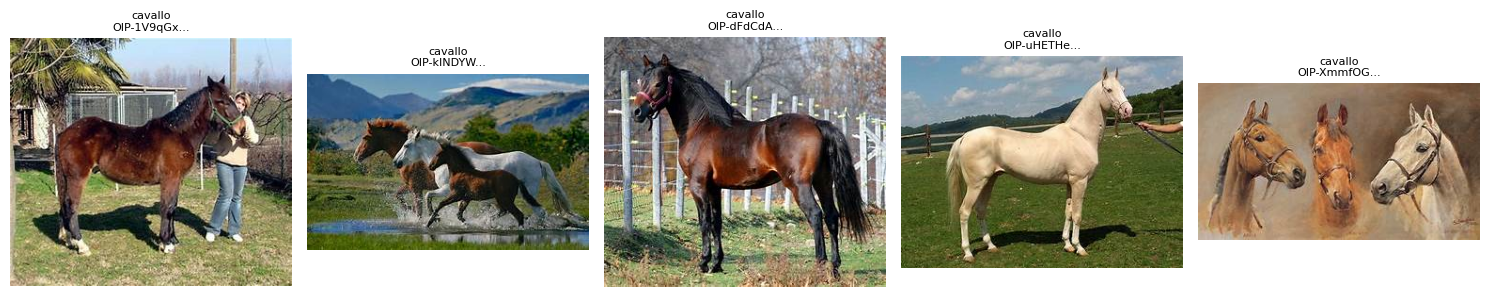


Class: cane


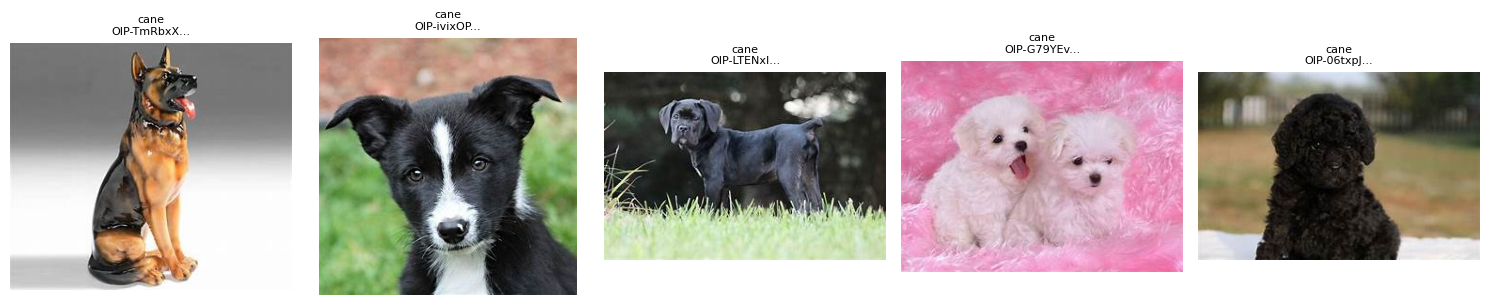


Class: gatto


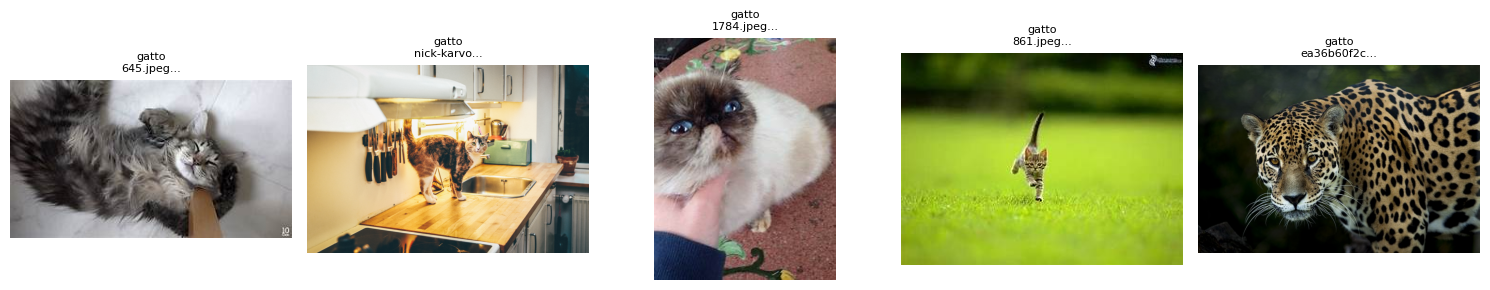


Class: scoiattolo


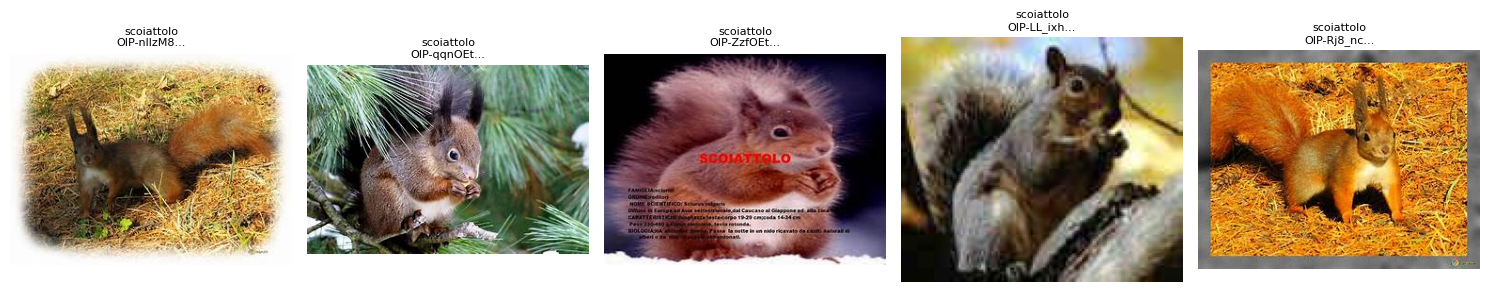


Class: ragno


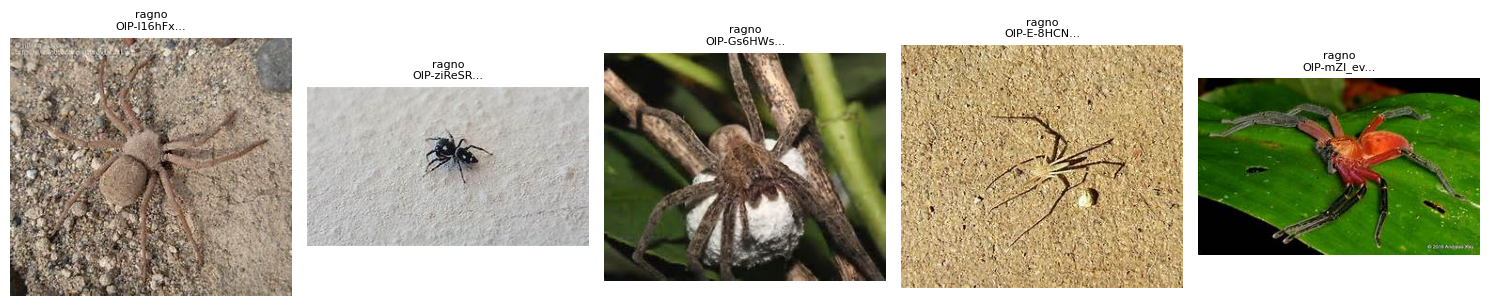


Class: elefante


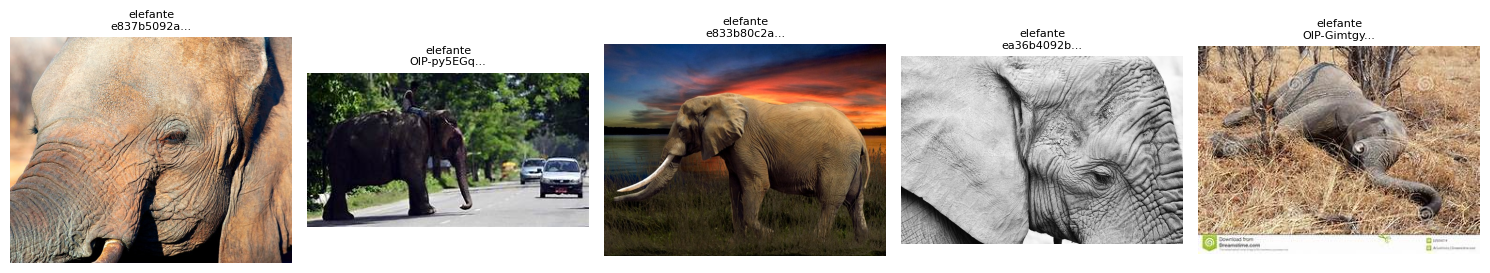


Class: farfalla


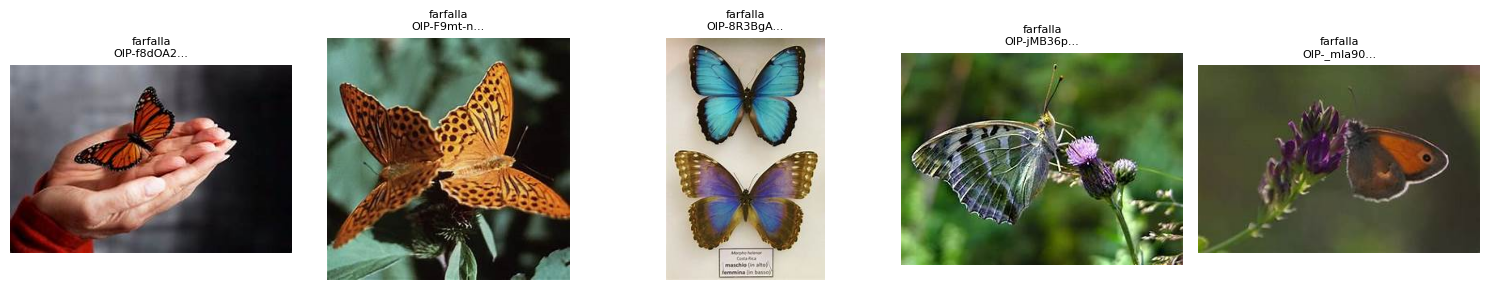


Class: mucca


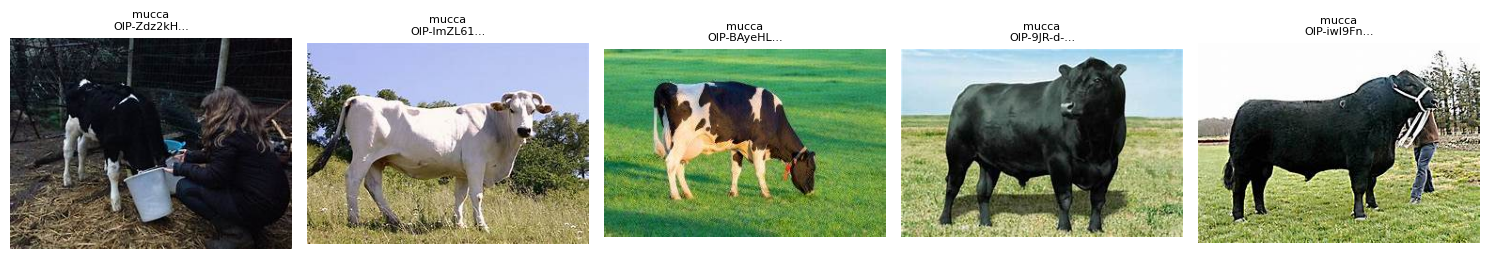

In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

raw_img_path = '/content/animals_dataset/raw-img/'
for folder in os.listdir(raw_img_path):
    folder_path = os.path.join(raw_img_path, folder)
    image_files = os.listdir(folder_path)[:5]  # First 5 images

    print(f"\nClass: {folder}")

    # Create a subplot with 5 images in a row
    plt.figure(figsize=(15, 3))
    for idx, image_file in enumerate(image_files):
        img_path = os.path.join(folder_path, image_file)

        # Load and plot image
        img = mpimg.imread(img_path)
        plt.subplot(1, 5, idx + 1)
        plt.imshow(img)
        plt.title(f"{folder}\n{image_file[:10]}...", fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


Setting up dataset for training in TensorFlow/Keras

To load images into TensorFlow tf.data.Dataset objects, which are great for efficient training. Same with validation set.

Now with two ready-to-use datasets:

train_dataset: batches of images and labels for training

val_dataset: batches for validation during training

In [8]:
import tensorflow as tf

batch_size = 16
img_height = 160
img_width = 160

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    raw_img_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    raw_img_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


Visualize samples from training dataset.
Takes 1 batch from the training dataset and visualizes the first 9 images with their class labels.
Converts image tensors to displayable format and shows them with the correct label

Classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


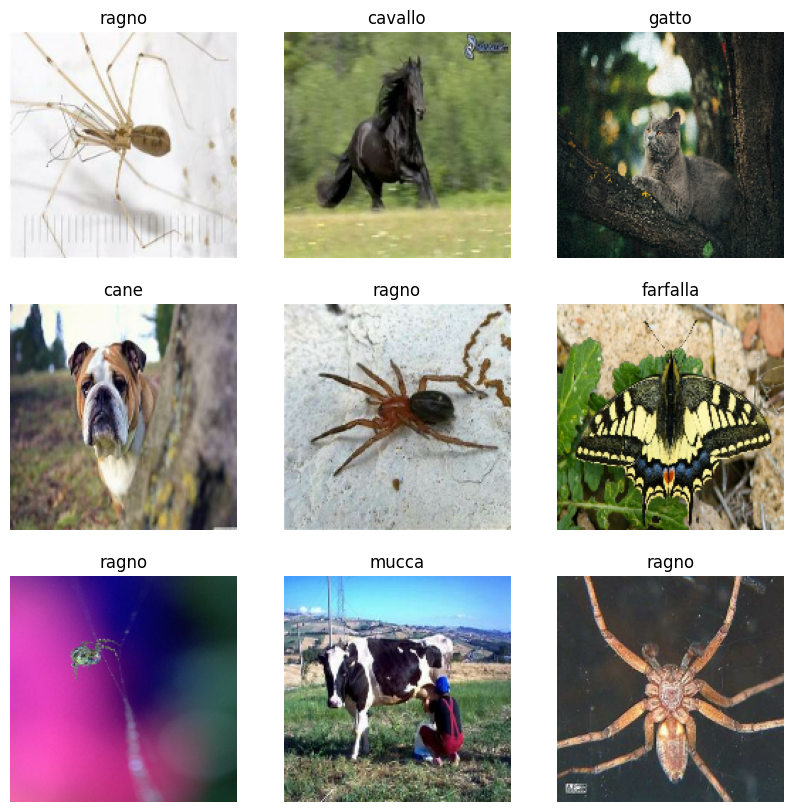

In [9]:
import matplotlib.pyplot as plt

class_names = train_dataset.class_names
print("Classes:", class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


The main library for building and training deep learning models.
Setting up TensorFlow/Keras environment to build and train a CNN model.

import tensorflow is the main library for building and training deep learning models

layers: to add layers like Conv2D, MaxPooling2D, Dense, etc.

models: to build the sequential model architecture

matplotlib to plot training/validation accuracy and loss curves later


Loading the dataset with a validation split (20%) and fixed seed for reproducibility.

Reduced image size and batch size to prevent memory issues — smart move.

Printed the class names for verification.

Applied shuffling and prefetching to optimize input pipeline performance.

shuffle(1000) randomizes training data order.

prefetch(buffer_size=AUTOTUNE) overlaps data preprocessing and model execution for speed.

In [11]:
# Load the dataset first
raw_img_path = '/content/animals_dataset/raw-img'

img_height = 160
img_width = 160    #Changed the img_height and width from 180 to 160, and batch_size from 31 to 16 due to RAM issue
batch_size = 16

# Load training and validation sets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    raw_img_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    raw_img_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Access class names before optimization
class_names = train_ds.class_names
print("Classes:", class_names)

# Optimize performance AFTER accessing class_names
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import itertools


In [16]:
# data augmentation is a small Sequential model that applies random transformations to your training images on the fly during training.
#Prevents overfitting
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),], name="data_augmentation")


# Converts pixel values from [0, 255] to [-1, 1]. Matches exactly how ResNet50V2 was trained on ImageNet.
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


# Freeze base model initially
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet')


#freeze all the weights of your pretrained ResNet50 so they won’t be updated during the first training phase.
base_model.trainable = False


# Now building the full model
mn_model = tf.keras.Sequential([
    data_augmentation,
    # layers.Rescaling(1./127.5, offset=-1),  # must match ResNet50 preprocessing
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
# Compile the Model

mn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Training ResNet50



In [12]:
IMG_SHAPE = (img_height, img_width, 3)

base_model_resnet = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

base_model_resnet.trainable = False

model_resnet = models.Sequential([
    base_model_resnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(class_names), activation='softmax')
])

model_resnet.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history_resnet = model_resnet.fit(train_ds,
                                 validation_data=val_ds,
                                 epochs=15)




94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/15
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.8066 - loss: 0.6074 - val_accuracy: 0.8926 - val_loss: 0.3112
Epoch 2/15
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - accuracy: 0.8952 - loss: 0.3143 - val_accuracy: 0.9119 - val_loss: 0.2722
Epoch 3/15
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 46s 32ms/step - accuracy: 0.9177 - loss: 0.2437 - val_accuracy: 0.9129 - val_loss: 0.2782
Epoch 4/15
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 47s 33ms/step - accuracy: 0.9249 - loss: 0.2228 - val_accuracy: 0.9186 - val_loss: 0.2695
Epoch 5/15
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 47s 33ms/step - accuracy: 0.9360 - loss: 0.1914 - val_accuracy: 0.9160 - val_loss: 0.2876
Epoch 6/15
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 47s 33ms/step - accuracy: 0.9428 - loss: 0.1631 - val_accuracy: 0.9230 - val_loss: 0.2768
Epoch 7/15
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 47s 33ms/step - accuracy: 0.9499 - loss: 0.1430 - val_accuracy: 0.9158 - val_loss: 0.3139
Epoch 8/15
1309/1309 ━━━━

Applying fine-tuning approach to ResNet model

Unfreeze last 50 layers of ResNet base for fine-tuning.

Compile with lower learning rate for stability.

Continue training from epoch 10 to 20 (adjust as needed).

Fine tuning Restnet with timing!!!

In [ ]:
import time

# Define helper if not already defined
def timed_training(model, train_data, val_data, epochs, initial_epoch=0):
    start = time.time()
    history = model.fit(train_data, validation_data=val_data,
                        epochs=epochs, initial_epoch=initial_epoch)
    end = time.time()
    print(f"Training time for epochs {initial_epoch} to {epochs}: {(end - start)/60:.2f} minutes")
    return history

# Unfreeze last 50 layers of ResNet50 base model for fine-tuning
base_model_resnet.trainable = True

for layer in base_model_resnet.layers[:-50]:
    layer.trainable = False

# Recompile with a lower learning rate
model_resnet.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Continue training for fine-tuning with timing
fine_tune_epochs_resnet = 10
total_epochs_resnet = 10 + fine_tune_epochs_resnet

history_fine_resnet = timed_training(model_resnet, train_ds, val_ds,
                                    total_epochs_resnet, initial_epoch=10)


Epoch 11/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 123s 120ms/step - accuracy: 0.9121 - loss: 0.3098 - val_accuracy: 0.9622 - val_loss: 0.1276
Epoch 12/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9602 - loss: 0.1242 - val_accuracy: 0.9853 - val_loss: 0.0492
Epoch 13/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9743 - loss: 0.0777 - val_accuracy: 0.9935 - val_loss: 0.0227
Epoch 14/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9826 - loss: 0.0563 - val_accuracy: 0.9968 - val_loss: 0.0124
Epoch 15/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9870 - loss: 0.0410 - val_accuracy: 0.9985 - val_loss: 0.0059
Epoch 16/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.9892 - loss: 0.0335 - val_accuracy: 0.9989 - val_loss: 0.0041
Epoch 17/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.9911 - loss: 0.0290 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 18/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9927 

In [ ]:
loss, acc = model_resnet.evaluate(val_ds)
print(f"Validation Accuracy: {acc:.2%}")

328/328 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9183 - loss: 0.3611
Validation Accuracy: 91.52%


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/animals_dataset/raw-img",
    image_size=(img_height, img_width) # Specify the correct image size
)

Found 26179 files belonging to 10 classes.


In [ ]:
import json

class_names = train_ds.class_names
print("Class names detected in training dataset:", class_names)

# Save class names for inference
with open("class_names.json", "w") as f:
    json.dump(class_names, f)

print(" Saved class_names.json file.")


Class names detected in training dataset: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
 Saved class_names.json file.


Combined plotting code for ResNet50 training + fine-tuning history

The red dashed vertical line marks when fine-tuning started (after epoch 9).

Adjust the x=10 - 1 if frozen epochs differ.

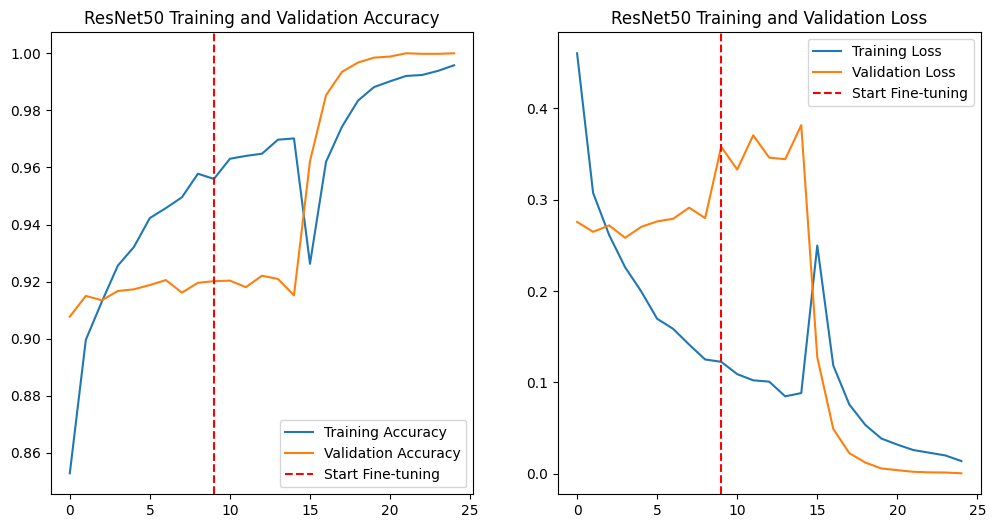

In [ ]:
# Combine original and fine-tuning history for ResNet50
acc_resnet = history_resnet.history['accuracy'] + history_fine_resnet.history['accuracy']
val_acc_resnet = history_resnet.history['val_accuracy'] + history_fine_resnet.history['val_accuracy']
loss_resnet = history_resnet.history['loss'] + history_fine_resnet.history['loss']
val_loss_resnet = history_resnet.history['val_loss'] + history_fine_resnet.history['val_loss']

epochs_range_resnet = range(len(acc_resnet))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range_resnet, acc_resnet, label='Training Accuracy')
plt.plot(epochs_range_resnet, val_acc_resnet, label='Validation Accuracy')
plt.axvline(x=10 - 1, color='r', linestyle='--', label='Start Fine-tuning')  # assuming first 10 epochs frozen
plt.legend(loc='lower right')
plt.title('ResNet50 Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_resnet, loss_resnet, label='Training Loss')
plt.plot(epochs_range_resnet, val_loss_resnet, label='Validation Loss')
plt.axvline(x=10 - 1, color='r', linestyle='--', label='Start Fine-tuning')
plt.legend(loc='upper right')
plt.title('ResNet50 Training and Validation Loss')

plt.show()


In [ ]:
# Save the model
from tensorflow.keras.models import load_model, Model
model_resnet.save("resnet_finetuned_my_model.keras")

# Later or in another notebook:
model = load_model("resnet_finetuned_my_model.keras")

328/328 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        cane       0.14      0.01      0.01       947
     cavallo       0.11      0.11      0.11       522
    elefante       0.16      0.02      0.04       273
    farfalla       0.07      0.03      0.04       429
     gallina       0.00      0.00      0.00       593
       gatto       0.06      0.23      0.09       331
       mucca       0.08      0.61      0.14       399
      pecora       0.07      0.02      0.03       382
       ragno       0.11      0.00      0.00       979
  scoiattolo       0.00      0.00      0.00       380

    accuracy                           0.08      5235
   macro avg       0.08      0.10      0.05      5235
weighted avg       0.09      0.08      0.04      5235



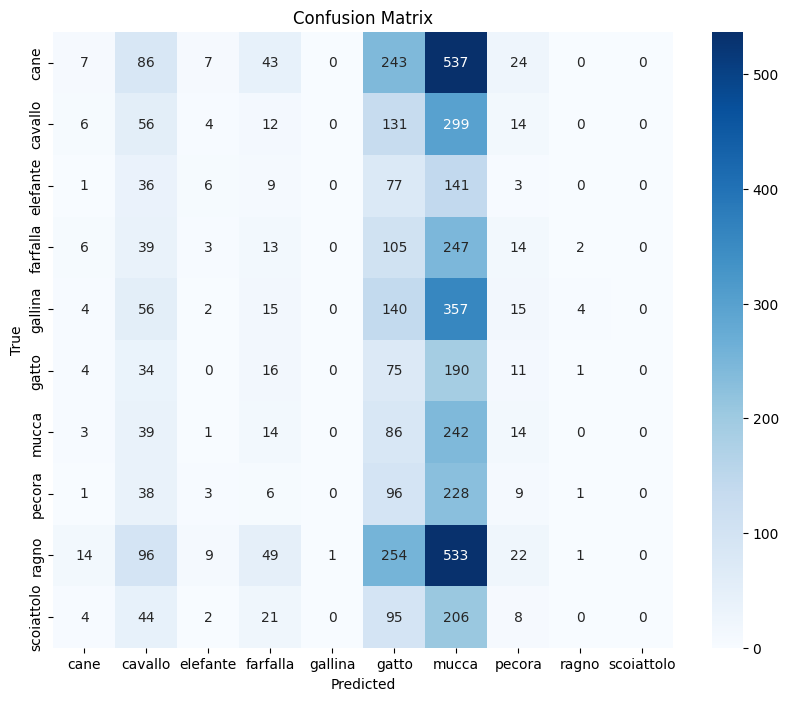

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
y_pred_probs = mn_model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = np.concatenate([y for x, y in val_ds], axis=0)
# y_true = np.argmax(y_true, axis=1)  # Remove this line

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Get model predictions
y_pred_probs = mn_model.predict(val_ds)                          # shape: (num_samples, num_classes)
y_pred = np.argmax(y_pred_probs, axis=1)                         # predicted class indices

# Get true labels
y_true = np.concatenate([y for x, y in val_ds], axis=0)          # one-hot encoded or integer labels
if y_true.ndim == 2:
    y_true = np.argmax(y_true, axis=1)                           # convert one-hot to class index

# Print overall metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # or 'macro'
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy :  {accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall   :  {recall:.4f}")
print(f"F1-score :  {f1:.4f}")

# Optional: Full classification report per class
from sklearn.metrics import classification_report
print("\n📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Accuracy :  0.0783
Precision:  0.1333
Recall   :  0.0783
F1-score :  0.0381

📋 Classification Report:

              precision    recall  f1-score   support

        cane     0.2000    0.0106    0.0201       947
     cavallo     0.0802    0.0805    0.0803       522
    elefante     0.1081    0.0147    0.0258       273
    farfalla     0.0707    0.0326    0.0447       429
     gallina     0.0000    0.0000    0.0000       593
       gatto     0.0699    0.2749    0.1115       331
       mucca     0.0795    0.5940    0.1403       399
      pecora     0.0672    0.0236    0.0349       382
       ragno     0.3333    0.0031    0.0061       979
  scoiattolo     0.0000    0.0000    0.0000       380

    accuracy                         0.0783      5235
   macro avg     0.1009    0.1034    0.0464      5235
weighted avg     0.1333    0.0783    0.0381      5235



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [48]:
# Save the model
from tensorflow.keras.models import load_model, Model
model_resnet.save("resnet_finetuned_my_model.keras")

# Later or in another notebook:
model = load_model("resnet_finetuned_my_model.keras")

In [42]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import tensorflow as tf
import numpy as np
import gradio as gr
from PIL import Image
import json
from tensorflow.nn import softmax

# Load your trained model from the SavedModel format
# Use tf.saved_model.load for SavedModel format
import tensorflow as tf

model = tf.keras.models.load_model("resnet_finetuned_my_model.keras")


# Define class names directly
class_names = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


# Preprocess image
def preprocess_image(image):
    image = image.resize((160, 160))  # ✅ match training size
    image = np.array(image)
    # Convert to float32 and add batch dimension
    image = tf.cast(image, tf.float32)
    image = np.expand_dims(image, axis=0)
    # Apply ResNet50 preprocessing
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image

# Inference function
def classify_image(image):
    image = preprocess_image(image)
    # For SavedModel, call the loaded model directly or use the appropriate signature
    # Assuming the loaded model has a default serving signature
    # You might need to inspect the loaded model's signatures if this doesn't work
    # For many image classification models, the default serving signature expects a batch of images
    try:
        # Attempt to use the default serving signature
        predictions = model.signatures['serving_default'](tf.constant(image))
        # The output key might vary, commonly 'predictions' or the output layer name
        # You might need to inspect the predictions dictionary to find the correct key
        # Let's assume the output key is 'output_0' or similar for now, or just take the first output
        # If the model has only one output tensor, you can access it like this:
        prediction_tensor = list(predictions.values())[0]
        prediction = prediction_tensor.numpy()[0]

    except KeyError:
        # If 'serving_default' signature is not found, try calling the model directly
        # This might work if the loaded object is a Keras model saved in SavedModel format
        prediction = model(tf.constant(image), training=False).numpy()[0]


    prediction = softmax(prediction).numpy()  # ✅ softmax
    return {class_names[i]: float(prediction[i]) for i in range(len(class_names))}

# Create Gradio interface
import gradio as gr

def classify_image(img):
    # Your model code returns a dict of class probabilities
    return {"cat": 0.7, "dog": 0.3}

interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),  # expects dict
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4a8c7a830d51fabe15.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
